# Breast Cancer state prediction

`The goal of this project is to apply supervised learning to the cancer data to predict whether a patient have a Benign or a Malignant cancer`

## Firstly Understanding the data at hand

### 1- Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # to use random forest classifier
from sklearn.metrics import accuracy_score  # to calculate accuracy score by calculating number of correct predictions out of the total
from sklearn.model_selection import train_test_split # to split the data into training and testing sets
from sklearn.neighbors import KNeighborsClassifier # to use KNN classifier

#### 2.1 - Description of the data

contains 569 data points, each of which has 30 features. The features are measurements of the size, shape, and texture of breast cancer cells. The target variable is whether the cancer is malignant (M) or benign (B).

### 2- Reading the data file and taking a look at the dataframe 

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### 2.2 - some basic analysis of the diagnosis column

from what we see the number of the Benign cases is more than the malignant cases 

`That may suggets that the data is a little unbalanced but results are still valid , since the difference is too little to affect the outcome`

This is the number of Benign cases vs Malignant cases


diagnosis
B    357
M    212
Name: count, dtype: int64

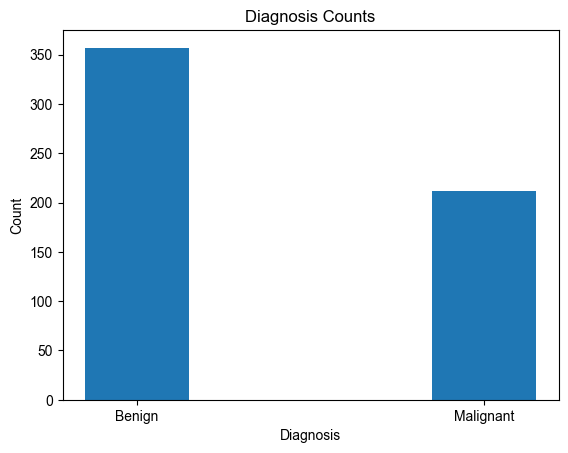

In [4]:
plt.bar(['Benign', 'Malignant'], df['diagnosis'].value_counts().values,width=0.3)
# Add style
#plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
# Add labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Counts');

print("This is the number of Benign cases vs Malignant cases")

df['diagnosis'].value_counts()

#### 2.3 - Examining the effect that the features have on each other (if there is a correlation between them)

`the result suggests a high correlation between the mean of texture and area and the worst of texture and area`

In [5]:
# Create a heatmap of the correlation matrix
sns.heatmap(data.corr(), cmap="coolwarm")

NameError: name 'data' is not defined

### 3 - Preparing the data for the ML models

#### 3.1 - moving the diagnosis of the patient to be the last column

In [ ]:
c1 = df['diagnosis']

df.drop(['diagnosis'], axis=1, inplace=True)

df.insert(len(df.columns), 'diagnosis', c1)

df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


#### 3.2 - change the type of the diagnosis column from object to category for the model to accept

In [ ]:
df['diagnosis'] =   df['diagnosis'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

#### 3.3 - Splitting the data into train and test groups with ratio 80:20

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['diagnosis'], axis=1), df['diagnosis'], test_size=0.2, random_state=42)

data = df.drop(['diagnosis'], axis=1)

#### 3.4 - Experimenting with Knearest Neighbors with changing the n_neighbors from 1 to 11

`The maximum test accuracy reached : 78% with 2 neighbors as hyper parameter`

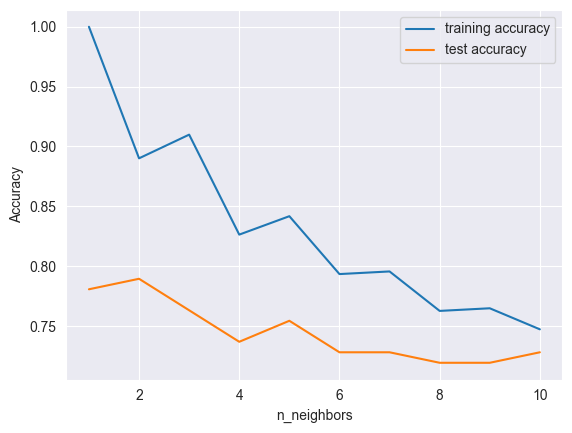

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(clf.score(xtrain, ytrain))
    # record generalization accuracy
    test_accuracy.append(clf.score(xtest, ytest))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();




#### 3.5 - Trying RandomForest model with n_estimators = 11

`The maximum test accuracy reached : 97% with 11 n_estimators as parameter`

Train Accuracy:  1.0
Test Accuracy:  0.9736842105263158


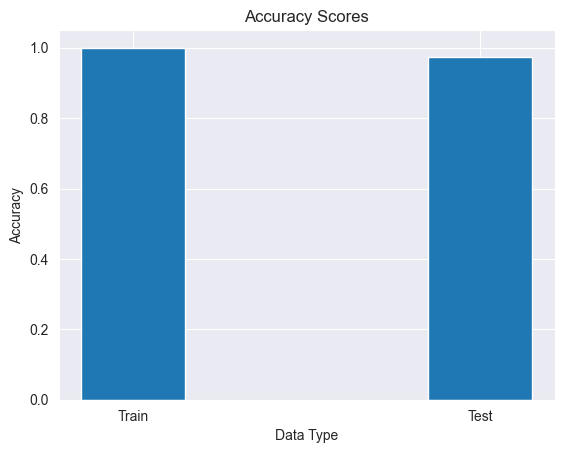

In [ ]:
rf = RandomForestClassifier(n_estimators=11, random_state=42)

rf.fit(xtrain, ytrain)

ypred_test = rf.predict(xtest)
ypred_train = rf.predict(xtrain)

print('Train Accuracy: ', accuracy_score(ytrain, ypred_train))
print('Test Accuracy: ', accuracy_score(ytest, ypred_test))

# put into a bar plot and put the values on top of each bar
plt.bar(['Train', 'Test'], [accuracy_score(ytrain, ypred_train), accuracy_score(ytest, ypred_test)], width=0.3)
plt.title('Accuracy Scores')
plt.ylabel('Accuracy')
plt.xlabel('Data Type');

### 4 - Analyzing Feature importance from within the Random Forest model

`results show that the most important features are : 'perimeter_worst' and 'concave points_mean'`

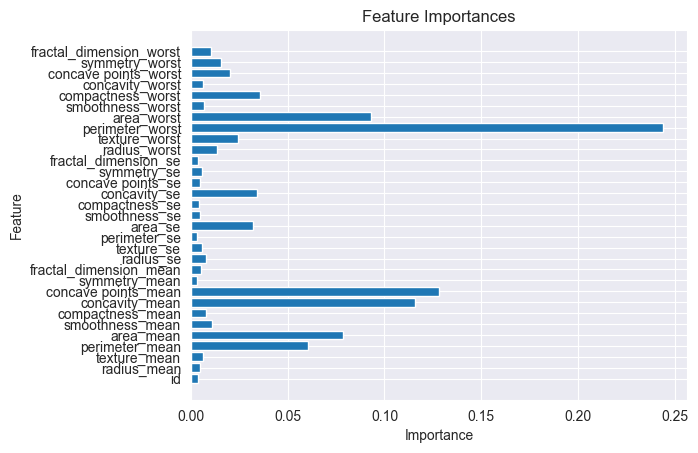

In [ ]:
# Get feature importances
feature_importances = rf.feature_importances_

# Plotting feature importances
plt.barh(data.columns, feature_importances)  # Use barh() for horizontal bars
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()